In [1]:
import sys
sys.path.append('../')
import coproc

In [6]:
import dataclasses

@dataclasses.dataclass
class EchoProcess(coproc.BaseWorkerProcess):
    '''Simply echoes back received data.'''
    verbose: bool = False
    def __call__(self):
        while True:
            try:
                data = self.messenger.receive_blocking()
            except coproc.ResourceRequestedClose:
                break
            
            if self.verbose: print(f'EchoProcess received: {data}')
            
            self.messenger.send_reply(data)
            
            if self.verbose: print(f'EchoProcess sent: {data}')

with coproc.WorkerResource(EchoProcess) as worker:
    worker.messenger.send_request('Hello, world!')
    print(worker.messenger.receive_blocking())

Hello, world!


In [3]:
@dataclasses.dataclass
class EchoResource:
    verbose: bool = False
    resource: coproc.WorkerResource = dataclasses.field(default_factory=lambda: coproc.WorkerResource(EchoProcess))
    
    def __enter__(self) -> coproc.PriorityMessenger:
        self.resource.start(verbose=self.verbose)
        return self
    
    def __exit__(self, *args):
        self.resource.terminate()
        
    def apply(self, data):
        self.messenger.send_request(data)
        return self.messenger.receive_blocking()
    
    @property
    def messenger(self):
        return self.resource.messenger

with EchoResource(verbose=True) as w:
    print(w.apply('Hello, world!'))

EchoProcess received: Hello, world!
EchoProcess sent: Hello, world!Hello, world!


starting main loop


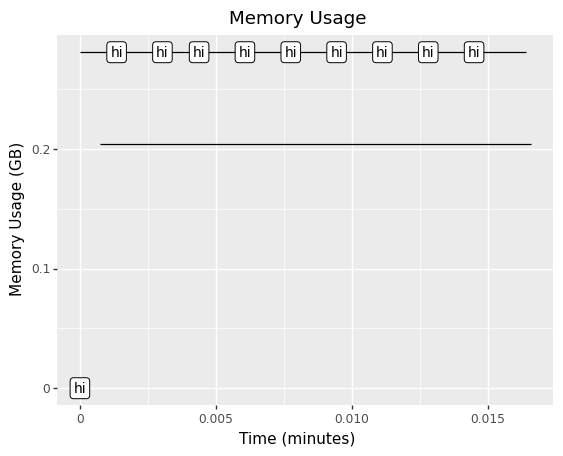

<ggplot: (8761101596868)>

In [5]:
import time
with coproc.Monitor(snapshot_seconds=0.01) as m:
    for _ in range(10):
        m.add_note('hi')
        time.sleep(0.1)
    stats = m.get_stats()
stats.get_stats_plot(font_size=10)